# Supervised Learning Coursework 1 Coding Part

In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from collections import defaultdict
from sklearn.model_selection import train_test_split

##### Initialise condition for question a

In [174]:
data_x = np.array([1, 2, 3, 4])
data_y = np.array([3, 2, 0, 5])

### Part 1

#### Question 1

In [175]:

def extract_features(x, degree):
    return np.array([x**i for i in range(degree + 1)]).T

def linear_regression(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

##### Question 1a

In [ ]:
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 5, 500)

for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y).round(2)
    X_plot = extract_features(x_plot, degree)
    y_plot = X_plot @ coeffs
    plt.plot(x_plot, y_plot, label=f'k={degree}')

plt.scatter(data_x, data_y, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5, 10)
plt.title('Polynomial Fits for Different Degrees')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

##### Question 1b

In [ ]:
for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y).round(2)
    print(f"Degree {degree+1} polynomial coefficients: {coeffs}")

##### Question 1c

In [ ]:
for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y)
    coeffs = coeffs.round(2)
    y_pred = X @ coeffs
    print(y_pred)
    mse = np.mean((data_y - y_pred) ** 2)
    print(f"MSE for k={degree}: {mse}")

#### Question 2

##### Question 2a i

In [ ]:
def g_sigma(x, sigma):
    noise = np.random.normal(0, sigma, size=len(x))
    return np.sin(2 * np.pi * x)**2 + noise

# 生成数据并绘图
np.random.seed(0)
x_sample = np.random.uniform(0,1,30)
y_sample = g_sigma(x_sample, sigma=0.07)

x_plot = np.linspace(0, 1, 500)
y_plot = np.sin(2 * np.pi * x_plot)**2

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='sin^2(2πx)')
plt.scatter(x_sample, y_sample, color='red', label='Noisy Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Noise')
plt.legend()
plt.grid(True)
plt.show()

##### Question 2a ii

In [ ]:
degrees = [2, 5, 10, 14, 18]
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 1, 500)
for degree in degrees:
    X = extract_features(x_sample, degree-1)
    coeffs = linear_regression(X, y_sample)
    X_plot = extract_features(x_plot, degree-1)
    y_plot = X_plot @ coeffs
    print(coeffs)
    plt.plot(x_plot, y_plot, label=f'k={degree}')


plt.scatter(x_sample, y_sample, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fits for Different Degrees')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 1.5)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


##### Question 2b

In [ ]:
training_errors = []
degrees = [i for i in range(1,19)]
for degree in range(0,18):
    X = extract_features(x_sample, degree)
    coeffs = linear_regression(X, y_sample)
    y_pred = X @ coeffs
    mse = np.mean((y_sample-y_pred)**2)
    training_errors.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(training_errors), marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Training Error vs Polynomial Dimension')
plt.grid(True)
plt.show()
print(training_errors)

##### Question 2c

In [ ]:
np.random.seed(0)
x_test = np.random.uniform(0,1,1000)
y_test = g_sigma(x_test, sigma=0.07)

testing_errors = []
degrees = [i for i in range(1,19)]
for degree in range(0,18):
    X = extract_features(x_sample, degree)
    coeffs = linear_regression(X, y_sample)
    X = extract_features(x_test, degree)
    y_pred = X @ coeffs
    mse = np.mean((y_test-y_pred)**2)
    testing_errors.append(mse)
for i in testing_errors:
    print(i)

plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(testing_errors), marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Testing Error vs Polynomial Dimension')
plt.grid(True)
plt.show()




##### Question 2d

In [ ]:
total_testing_errors = [0 for i in range(18)]
for experiment in range(100):
    np.random.seed(experiment)
    sub_x_sample = np.random.uniform(0,1,30)
    sub_y_sample = g_sigma(sub_x_sample, sigma=0.07)
    for degree in range(0,18):
        X = extract_features(sub_x_sample, degree)
        coeffs = linear_regression(X, sub_y_sample)
        X = extract_features(x_test, degree)
        y_pred = X @ coeffs
        mse = np.mean((y_test-y_pred)**2)
        testing_errors.append(mse)
    total_testing_errors  = [x + y for x, y in zip(total_testing_errors, testing_errors)]
average_testing_errors = [x/100 for x in total_testing_errors]
plt.figure(figsize=(10, 6))
for i in average_testing_errors:
    print(i)
plt.plot([i for i in range(1,19)], np.log(average_testing_errors), marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(avg MSE)')
plt.title('Log Average Testing Error vs Polynomial Dimension')
plt.grid(True)
plt.show()

#### Question 3


In [ ]:
def extract_features_trig(x, degree):
    return np.column_stack([np.sin((i + 1) * np.pi * x) for i in range(degree)])
np.random.seed(0)


x_test = np.random.uniform(0, 1, 1000)
y_test = g_sigma(x_test, sigma=0.07)


n_experiments = 100 
degrees = [i for i in range(1, 19)]  

x_sample = np.random.uniform(0, 1, 50)
y_sample = g_sigma(x_sample, sigma=0.07)

testing_errors = []

for degree in degrees:
    X_train = extract_features_trig(x_sample, degree)
    coeffs = linear_regression(X_train, y_sample)
    
    X_test = extract_features_trig(x_test, degree)
    y_pred = X_test @ coeffs
    mse = np.mean((y_test - y_pred) ** 2)
    testing_errors.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(testing_errors), marker='o')
plt.xlabel('Basis Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Testing Error vs Basis Dimension (Trig Basis)')
plt.grid(True)
plt.show()


testing_errors_all = []

for experiment in range(n_experiments):
   
    x_sample = np.random.uniform(0, 1, 50)
    y_sample = g_sigma(x_sample, sigma=0.07)
  
    testing_errors = []
    
    for degree in degrees:
       
        X_train = extract_features_trig(x_sample, degree)
        coeffs = linear_regression(X_train, y_sample)
        
        # 提取测试特征并计算误差
        X_test = extract_features_trig(x_test, degree)
        y_pred = X_test @ coeffs
        mse = np.mean((y_test - y_pred) ** 2)
        testing_errors.append(mse)
    testing_errors_all.append(testing_errors)

average_testing_errors = np.mean(testing_errors_all, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(average_testing_errors), marker='o')
plt.xlabel('Basis Dimension (k)')
plt.ylabel('ln(avg MSE)')
plt.title('Log Average Testing Error vs Basis Dimension (Trig Basis)')
plt.grid(True)
plt.show()

### Question 4

In [ ]:
csv_link = "http://www.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"

data = pd.read_csv(csv_link)

display(data.head())

In [232]:
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1] 
results = {"method": [], "train_mse": [], "test_mse": []}
Naive_result = defaultdict(list)
Single_result = {f'Single Attribute{i+1}':defaultdict(list)for i in range(X.shape[1])}
All_result = defaultdict(list)
# Define number of runs
num_runs = 20

for _ in range(num_runs):
    # Split data into training and testing sets (2/3 for training, 1/3 for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=None)

    # (a) Predicting with the mean y-value on the training set
    ones_train = np.ones_like(y_train).reshape(-1, 1)
    ones_test = np.ones_like(y_test).reshape(-1, 1)

    w_naive = linear_regression(ones_train, y_train)

    y_train_pred_naive = ones_train@w_naive
    y_test_pred_naive = ones_test@w_naive

    train_mse_naive = np.mean((y_train - y_train_pred_naive) ** 2)
    test_mse_naive = np.mean((y_test - y_test_pred_naive) ** 2)

    Naive_result["train_mse"].append(train_mse_naive)
    Naive_result["test_mse"].append(test_mse_naive)

    # (b) Predicting with a single attribute and a bias term
    for i in range(X.shape[1]):
        X_single_train = X_train.iloc[:, i].values.reshape(-1, 1)
        X_single_test = X_test.iloc[:, i].values.reshape(-1, 1)

        X_single_train = X_single_train.reshape(-1)
        X_single_train = extract_features(X_single_train, 1)
        w_single = linear_regression(X_single_train, y_train)

        X_single_test = X_single_test.reshape(-1)
        X_single_test = extract_features(X_single_test, 1)

        y_train_pred_singhe = X_single_train@w_single
        y_test_pred_single = X_single_test@w_single

        train_mse_single = np.mean((y_train-y_train_pred_singhe)**2)
        test_mse_single = np.mean((y_test-y_test_pred_single)**2)

        Single_result[f'Single Attribute{i+1}']["train_mse"].append(train_mse_single)
        Single_result[f'Single Attribute{i+1}']["test_mse"].append(test_mse_single)

    # (c) Predicting with all attributes
    w_all = linear_regression(X_train, y_train)

    y_train_pred_all = X_train@w_all
    y_test_pred_all = X_test@w_all

    train_mse_all = np.mean((y_train-y_train_pred_all)**2)
    test_mse_all = np.mean((y_test-y_test_pred_all)**2)

    All_result["train_mse"].append(train_mse_all)
    All_result["test_mse"].append(test_mse_all)

Naive_result["train_mse"] = np.mean(Naive_result["train_mse"])
Naive_result["test_mse"] = np.mean(Naive_result["test_mse"])

print('question a')
print("Naive method:")
print(f"Train MSE: {Naive_result['train_mse']}")
print(f"Test MSE: {Naive_result['test_mse']}")
print('')
print('question b')
print('The naive regression in problem a simply computes the mean of the training set and uses that as the prediction for all test data points.')
print('')
print('question c')
for i in range(X.shape[1]):
    Single_result[f'Single Attribute{i+1}']["train_mse"] = np.mean(Single_result[f'Single Attribute{i+1}']["train_mse"])
    Single_result[f'Single Attribute{i+1}']["test_mse"] = np.mean(Single_result[f'Single Attribute{i+1}']["test_mse"])
    print(f"Single Attribute {i+1}:")
    print(f"Train MSE: {Single_result[f'Single Attribute{i+1}']['train_mse']}")
    print(f"Test MSE: {Single_result[f'Single Attribute{i+1}']['test_mse']}")
    print('')
print('question d')
All_result["train_mse"] = np.mean(All_result["train_mse"])
All_result["test_mse"] = np.mean(All_result["test_mse"])
print("All Attributes:")
print(f"Train MSE: {All_result['train_mse']}")
print(f"Test MSE: {All_result['test_mse']}")

question a
Naive method:
Train MSE: 84.6018444998195
Test MSE: 84.2788554281913

question b
The naive regression in problem a simply computes the mean of the training set and uses that as the prediction for all test data points.

question c
Single Attribute 1:
Train MSE: 72.08762178623749
Test MSE: 71.61097143068454

Single Attribute 2:
Train MSE: 73.93602481669325
Test MSE: 73.0265327079636

Single Attribute 3:
Train MSE: 65.22876672018484
Test MSE: 63.8449481262367

Single Attribute 4:
Train MSE: 81.92410836988684
Test MSE: 82.36703468631644

Single Attribute 5:
Train MSE: 69.43376331083445
Test MSE: 68.37608432850912

Single Attribute 6:
Train MSE: 43.54941068158482
Test MSE: 44.009529481953464

Single Attribute 7:
Train MSE: 73.30424977593421
Test MSE: 70.97672757553008

Single Attribute 8:
Train MSE: 79.54841523151605
Test MSE: 78.65153857570132

Single Attribute 9:
Train MSE: 72.13428018796387
Test MSE: 72.47061177119674

Single Attribute 10:
Train MSE: 66.11345348612653
Test MSE

### Question 5

In [ ]:

# def gaussian_kernel(x1,x2,sigma):                   # x1,x2为输入空间
#     m,n = x1.shape[0], x2.shape[0]           #获取行数
#     dist_matrix = np.zeros((m,n), dtype=float)   #全零核矩阵
#     for i in range(m):
#         for j in range(n):
#             dist_matrix[i][j] = np.sum((x1[i]-x2[j])**2)    #向量差的平方和
#     return np.exp(-0.5/sigma**2*dist_matrix)

# def gaussian_kernel(x1,x2,sigma):
#     #calculate gaussian kernel
#     n = x1.shape[0]
#     m = x2.shape[0]
#     K = np.zeros((n,m))
#     for i in range(n):
#         for j in range(m):
#             K[i,j] = np.exp(-np.linalg.norm(x1[i]-x2[j])**2/(2*sigma**2))
#     return K
def gaussian_kernel(X1,X2,sigma):
    X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
    X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
    dist_sq = X1_sq + X2_sq - 2 * X1@X2.T

    # 计算高斯核矩阵
    K = np.exp(-dist_sq / (2 * (sigma ** 2)))

    return K

def kernel_ridge_regression(X_train, y_train, gamma, sigma):
    K = gaussian_kernel(X_train, X_train, sigma)
    print(K)
    w =  np.linalg.pinv(K + gamma * len(K) * np.eye(len(K))) @ y_train
    return w

def kfold_cross_validation(X, y, k, gamma, sigma):
    n_samples = len(X)
    fold_size = n_samples // k
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    errors = []

    for i in range(k):
        valid_indices = indices[i * fold_size:(i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_valid = X[train_indices], X[valid_indices]
        y_train, y_valid = y[train_indices], y[valid_indices]

        w = kernel_ridge_regression(X_train, y_train, gamma, sigma)
        K_valid = gaussian_kernel(X_train, X_valid, sigma)
        y_val_pred = K_valid.T @ w
        errors.append(np.mean((y_valid - y_val_pred) ** 2))
    print(errors)

    return np.mean(errors)

In [333]:
data_url = "http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"
data = pd.read_csv(data_url)

# 提取特征和目标
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
gammas = []
sigmas = []
gamma_index = []
sigma_index = []

for i in range(-40, -25):
    gammas.append(2**i)
    gamma_index.append(i)

for i in np.arange(7, 13.5, 0.5):
    sigmas.append(2**i)
    sigma_index.append(i)

# 记录结果
results = []
various_results = []

best_gamma = None
best_sigma = None
best_cv_error = float('inf')
cv_errors = np.zeros((len(sigmas), len(gammas)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


gamma_power = -40
sigma_power = 7
best_gamma_power = 0
best_sigma_power = 0
for gamma in gammas:
    for sigma in sigmas:
        print(gamma_power, sigma_power)
        cv_error = kfold_cross_validation(X_train, y_train, k=5, gamma=gamma, sigma=sigma)
        cv_errors[sigma_index.index(np.log2(sigma)), gamma_index.index(np.log2(gamma))] = cv_error
        results.append({'gamma': gamma, 'sigma': sigma, 'cv_error': cv_error})

        if cv_error < best_cv_error:
            best_gamma = gamma
            best_sigma = sigma
            best_gamma_power = gamma_power
            best_sigma_power = sigma_power
            best_cv_error = cv_error
        sigma_power += 0.5
    sigma_power = 7
    gamma_power += 1

# 输出最佳参数
print(f"Best Gamma: 2^{best_gamma_power}, Best Sigma: 2^{best_sigma_power}, CV Error: {best_cv_error}")


-40 7
0 67
[[1.         0.99986767 0.00101195 ... 0.00857924 0.16079195 0.0103211 ]
 [0.99986767 1.         0.00101347 ... 0.00859606 0.16107995 0.01033846]
 [0.00101195 0.00101347 1.         ... 0.80347403 0.17743452 0.74716571]
 ...
 [0.00857924 0.00859606 0.80347403 ... 1.         0.48394693 0.95617535]
 [0.16079195 0.16107995 0.17743452 ... 0.48394693 1.         0.49771942]
 [0.0103211  0.01033846 0.74716571 ... 0.95617535 0.49771942 1.        ]]
67 134
[[1.         0.67963585 0.01785862 ... 0.91347799 0.56875315 0.91653291]
 [0.67963585 1.         0.09301917 ... 0.59606004 0.90854786 0.66852217]
 [0.01785862 0.09301917 1.         ... 0.00836249 0.15663648 0.01011052]
 ...
 [0.91347799 0.59606004 0.00836249 ... 1.         0.48394693 0.95617535]
 [0.56875315 0.90854786 0.15663648 ... 0.48394693 1.         0.49771942]
 [0.91653291 0.66852217 0.01011052 ... 0.95617535 0.49771942 1.        ]]
134 201
[[1.         0.67963585 0.01785862 ... 0.91347799 0.56875315 0.91653291]
 [0.67963585 

(15, 13)
(15, 13) (15, 13)


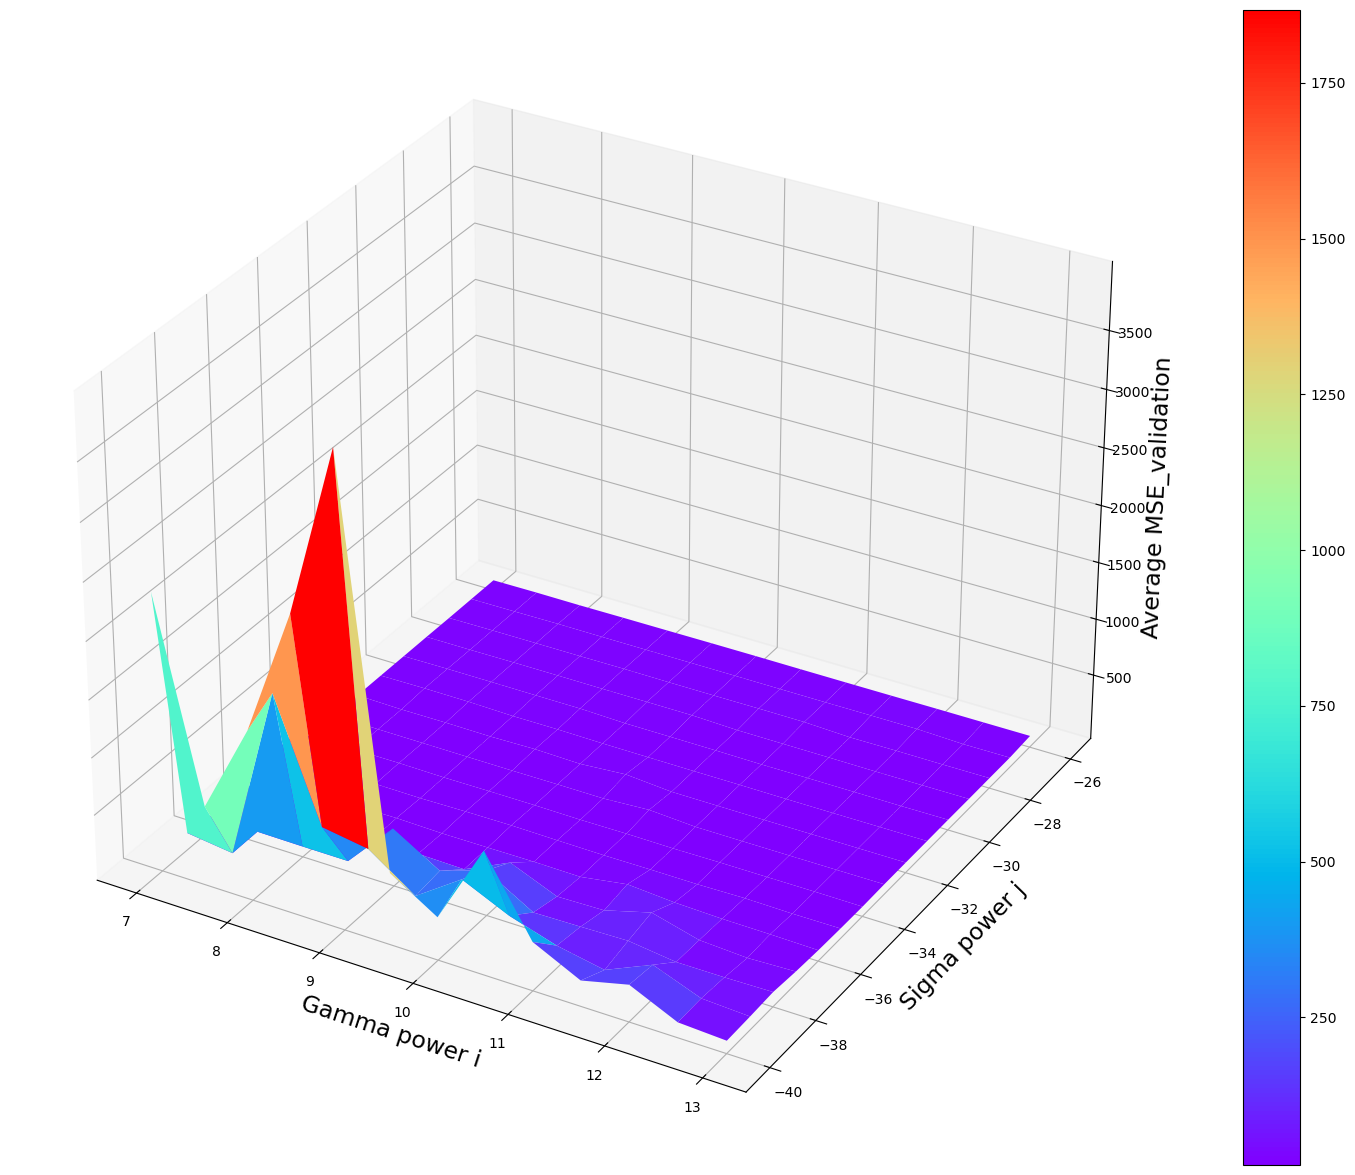

In [301]:
Z = cv_errors
Z = Z.reshape(15,13)
print(Z.shape)
X, Y = np.meshgrid(sigma_index,gamma_index)
print(X.shape,Y.shape)
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Gamma power i', fontsize=17)
ax.set_ylabel('Sigma power j', fontsize=17)
ax.set_zlabel('Average MSE_validation', fontsize=17)
surface = ax.plot_surface(X, Y, Z, cmap='rainbow')
fig.colorbar(surface)
fig.savefig('5(b).png', bbox_inches = 'tight')

In [334]:
w = kernel_ridge_regression(X_train, y_train, best_gamma, best_sigma)
K_test = gaussian_kernel(X_train, X_test, best_sigma)
K_train = gaussian_kernel(X_train, X_train, best_sigma)

y_test_pred = K_test.T @ w
y_train_pred = K_train.T @ w

train_mse = np.mean((y_train - y_train_pred) ** 2)
test_mse = np.mean((y_test - y_test_pred) ** 2)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")

[[1.         0.0860043  0.91839378 ... 0.85659994 0.14439076 0.91647855]
 [0.0860043  1.         0.19396242 ... 0.05038887 0.95726811 0.19448077]
 [0.91839378 0.19396242 1.         ... 0.71601801 0.29400868 0.99787101]
 ...
 [0.85659994 0.05038887 0.71601801 ... 1.         0.08606277 0.73216366]
 [0.14439076 0.95726811 0.29400868 ... 0.08606277 1.         0.2934922 ]
 [0.91647855 0.19448077 0.99787101 ... 0.73216366 0.2934922  1.        ]]
Train MSE: 0.9552097928522386, Test MSE: 153.04180381145352


# test

In [323]:
def gauss_kernel(xi,xj,sigma):
    return np.exp(-(np.linalg.norm(xi-xj))**2/(2*sigma**2))


# return the kernel matrix K
def K_Matrix(x,y,sigma):
    K_mat = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            xi=x[i]
            xj=y[j]          
            K_mat[i,j]= gauss_kernel(xi,xj,sigma)
    return K_mat


# construct the K_fold data
def K_fold_data(data_train,K,i):
    x_train = data_train.iloc[:, :12].values
    y_train = data_train.iloc[:,12].values
    fold_size= len(x_train)// K
    set_start = i * fold_size # valid set start point
    set_end = (i + 1) * fold_size # valid set end point
    
    # consider if the end point exceed total data
    # connect the other sets
    x_valid = x_train[set_start :min(set_end,len(x_train))]
    y_valid = y_train[set_start :min(set_end,len(x_train))]
    x_train = np.concatenate((x_train[0 : set_start], x_train[min(set_end,len(x_train)) :]))            
    y_train = np.concatenate((y_train[0 : set_start], y_train[min(set_end,len(y_train)) :]))           
       
    return x_train, y_train, x_valid, y_valid


# define the error matrix
def err_matrix(gamma,sigma,K,data_train):
    err_matrix = np.zeros((len(gamma),len(sigma)))
    # for each pair of sigma and gamma, calculater the corresponding error and store in a matrix
    for g in range(len(gamma)):
        for s in range(len(sigma)):
            for i in range(K):
                x_train, y_train, x_valid, y_valid = K_fold_data(data_train,K,i)
                K_mat = K_Matrix(x_train,x_train,sigma[s]) # K
                print(K_mat)
                w = np.linalg.pinv(K_mat + gamma[g] * len(K_mat) * np.eye(len(K_mat))) @ y_train #alpha
                K_val = K_Matrix(x_train,x_valid,sigma[s])  # K(x,x_test)

                error1 = np.dot(w.T,K_val) - y_valid
                valid_MSE = np.dot(error1,error1.T)/len(x_valid) 
                
            err_matrix[g][s] = valid_MSE
           # print('The gamma value is 2^' + str(gamma_index[g]))
           # print('The sigma value is 2^' + str(sigma_index[s]))
           # print('MSE in the validation set is' + str(err_matrix[g][s]))
           # print('')
     
    return  err_matrix/K



In [324]:
gamma = []
sigma = []
gamma_index = []
sigma_index = []
for i in range(-40, -25):
        gamma.append(2**i)
        gamma_index.append(i)

for i in np.arange(7,13.5,0.5):
        sigma.append(2**i)
        sigma_index.append(i)

sigma = np.array(sigma)
gamma = np.array(gamma)


In [325]:
# 5(a)
data_url = "http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"
Boston_data = pd.read_csv(data_url)
data_train, data_test = train_test_split(Boston_data , test_size=1/3, random_state=42)
K = 5
error_mat = err_matrix(gamma,sigma,K,data_train)

# find the minimal entry in the err_matrix and find its i,j
mini = np.min(error_mat)

for i in range(error_mat.shape[0]):
    for j in range(error_mat.shape[1]):
        if error_mat[i,j] == mini:
            best_gamma_power = gamma_index[i]
            best_sigma_power = sigma_index[j]
            print('Minimum mean error is'+ str(np.min(error_mat)))
            print('The best gamma is 2^'+ str((best_gamma_power)))
            print('The best sigma is 2^'+ str((best_sigma_power)))





[[1.         0.02072516 0.93163944 ... 0.80846501 0.02029571 0.83565447]
 [0.02072516 1.         0.00879802 ... 0.00782117 0.98410826 0.08696101]
 [0.93163944 0.00879802 1.         ... 0.72875209 0.00870046 0.68483372]
 ...
 [0.80846501 0.00782117 0.72875209 ... 1.         0.0074068  0.53606363]
 [0.02029571 0.98410826 0.00870046 ... 0.0074068  1.         0.08613767]
 [0.83565447 0.08696101 0.68483372 ... 0.53606363 0.08613767 1.        ]]
[[1.         0.00739674 0.84344714 ... 0.73376345 0.02084869 0.83993293]
 [0.00739674 1.         0.03762142 ... 0.00253904 0.91636224 0.03782277]
 [0.84344714 0.03762142 1.         ... 0.51268179 0.0864411  0.99574656]
 ...
 [0.73376345 0.00253904 0.51268179 ... 1.         0.0074068  0.53606363]
 [0.02084869 0.91636224 0.0864411  ... 0.0074068  1.         0.08613767]
 [0.83993293 0.03782277 0.99574656 ... 0.53606363 0.08613767 1.        ]]
[[1.         0.00739674 0.84344714 ... 0.73376345 0.02084869 0.83993293]
 [0.00739674 1.         0.03762142 ... 

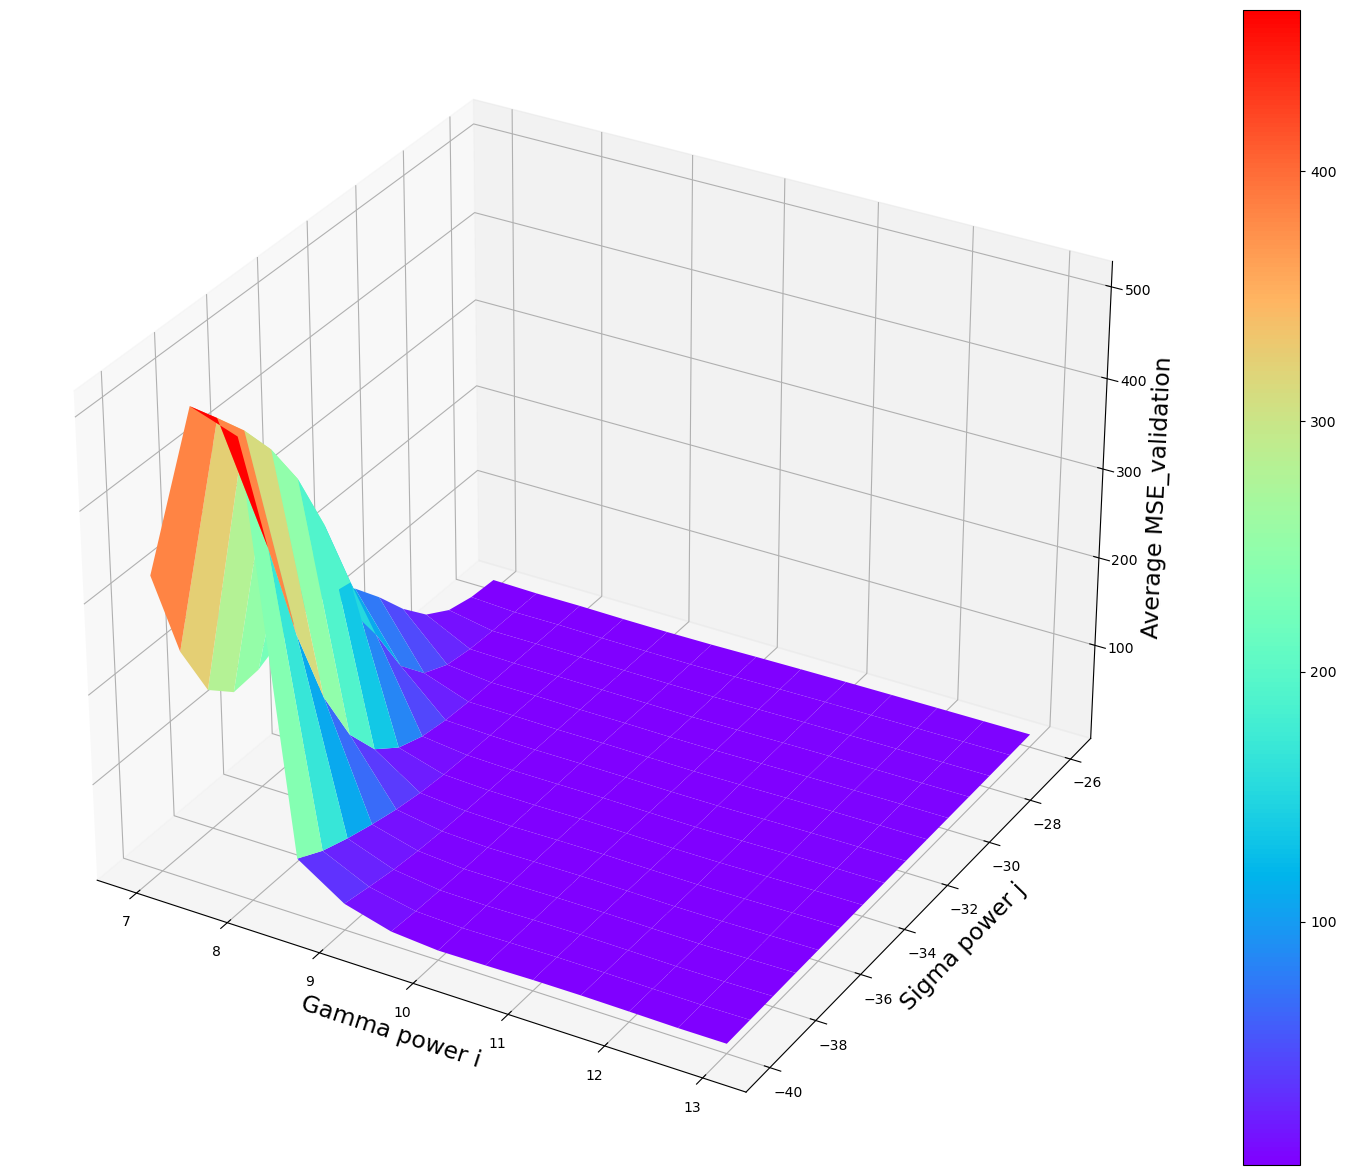

In [326]:
Z = error_mat  # mean over folds of valid error
X, Y = np.meshgrid(sigma_index,gamma_index)
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Gamma power i', fontsize=17)
ax.set_ylabel('Sigma power j', fontsize=17)
ax.set_zlabel('Average MSE_validation', fontsize=17)
surface = ax.plot_surface(X, Y, Z, cmap = 'rainbow')
fig.colorbar(surface)
fig.savefig('5(b).png', bbox_inches = 'tight')

In [329]:
#==================================================
# 5(c) 
# fix gamma sigma
gamma_best = 2**(best_gamma_power)
sigma_best = 2**(best_sigma_power)
x_train = data_train.iloc[:, :12].values
y_train = data_train.iloc[:,12].values
x_test = data_test.iloc[:, :12].values
y_test = data_test.iloc[:,12].values
k_train = K_Matrix(x_train,x_train,sigma_best)
k_test = K_Matrix(x_train,x_test,sigma_best)
w = np.linalg.pinv(k_train + gamma_best * len(k_train) * np.eye(len(k_train))) @ y_train #alpha
error_train = np.dot(w.T,k_train) - y_train
train_MSE = np.dot(error_train,error_train.T)/len(x_train)
    
error_test = np.dot(w.T,k_test) - y_test
test_MSE = np.dot(error_train,error_train.T)/len(x_test)    
    
print('Train MSE = '+str(train_MSE))
print('Test MSE = '+str(test_MSE))

Train MSE = 8.94627380729886
Test MSE = 17.839611083193585


# PART 2 

## 2.1 K-Nearest Neighbors

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### 2.1.1 Generating the Data

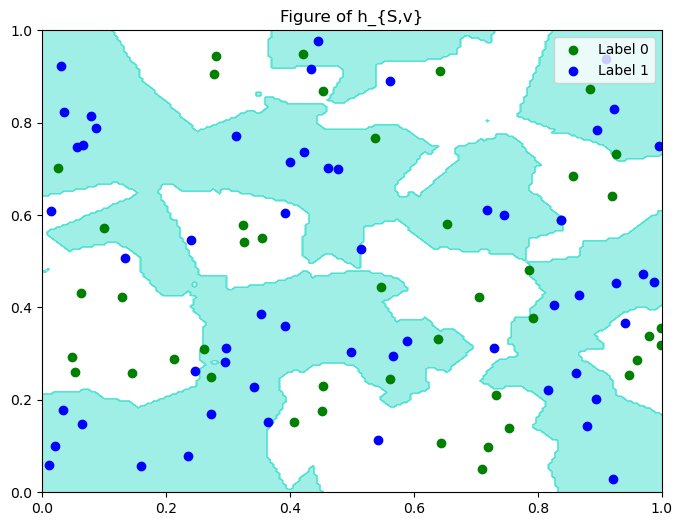

In [38]:
np.random.seed(77)
S = 100
X = np.random.rand(S, 2)
y = np.random.choice([0, 1], size = S)

def h_S_v(x_S, y_S, x, v):
    distances = np.linalg.norm(x_S - x, axis=1)
    nearest_indices = np.argsort(distances)[:v]
    nearest_labels = y_S[nearest_indices]

    return np.bincount(nearest_labels).argmax()

def plot_boundary(x_S, y_S, v, resolution=200):

    # Build Grid
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    predictions = np.array([h_S_v(x_S, y_S, point, v) for point in grid_points])
    Z = predictions.reshape(xx.shape)

    custom_cmap = ListedColormap(['white', 'turquoise'])
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha = 0.5, cmap = custom_cmap)
    plt.scatter(x_S[y_S == 0][:,0], x_S[y_S == 0][:,1], c = 'green', label = "Label 0")
    plt.scatter(x_S[y_S == 1][:,0], x_S[y_S == 1][:,1], c = 'blue', label = "Label 1")
    plt.title("Figure of h_{S,v}")
    plt.legend()
    plt.show()

plot_boundary(X, y , v = 3)


### 2.1.2 Estimated generalization error of k-NN as a function of k

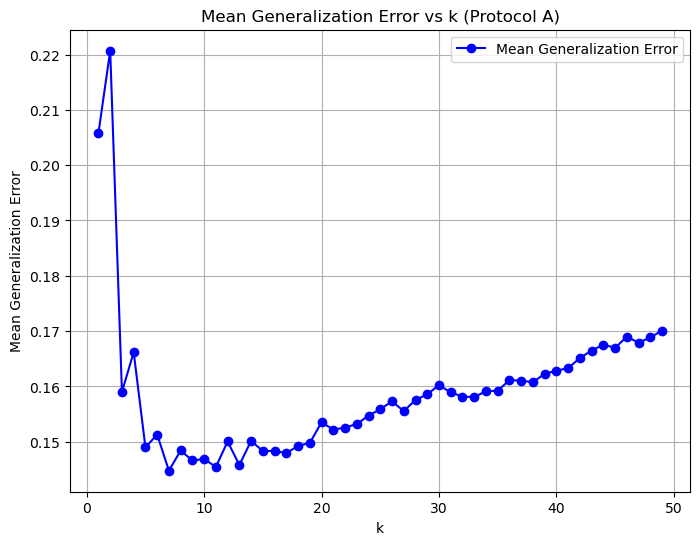

In [39]:
def generate_noise(S, v=3, size=1000, noise_prob=0.2):
    x_S, y_S = S
    X = np.random.rand(size, 2)
    y = []
    for x in X:
        if np.random.rand() > noise_prob:
            y.append(h_S_v(x_S, y_S, x, v))
        else:
            y.append(np.random.choice([0,1]))
    return X, np.array(y)

def calculate_error(X_train, y_train, X_test, y_test, k):
    errors = 0
    for i in range(len(X_test)):
        pred = h_S_v(X_train, y_train, X_test[i], k)
        if pred != y_test[i]:
            errors += 1
    return errors/len(X_test)

def generalize_err(S, ks, runs = 100, train_size = 1000, test_size = 1000):
    mean_errors = []
    for k in ks:
        errors = []
        for _ in range(runs):
            X_train, y_train = generate_noise(S, v=3, size=train_size, noise_prob=0.2)
            X_test, y_test = generate_noise(S, v=3, size=test_size, noise_prob=0.2)

            error = calculate_error(X_train, y_train, X_test, y_test, k)
            errors.append(error)
        mean_errors.append(np.mean(errors))
    return mean_errors

np.random.seed(77)
S_size = 100
x_S = np.random.rand(S_size, 2)
y_S = np.random.choice([0, 1], size=S_size)
S = (x_S, y_S)

ks = range(1, 50)

mean_errors = generalize_err(S, ks, runs=100, train_size=4000, test_size=1000)

plt.figure(figsize=(8, 6))
plt.plot(ks, mean_errors, marker='o', linestyle='-', color='b', label='Mean Generalization Error')
plt.title('Mean Generalization Error vs k (Protocol A)')
plt.xlabel('k')
plt.ylabel('Mean Generalization Error')
plt.grid()
plt.legend()
plt.show()

### 2.1.3 Determine the optimal k as a function of the number of training points (m)

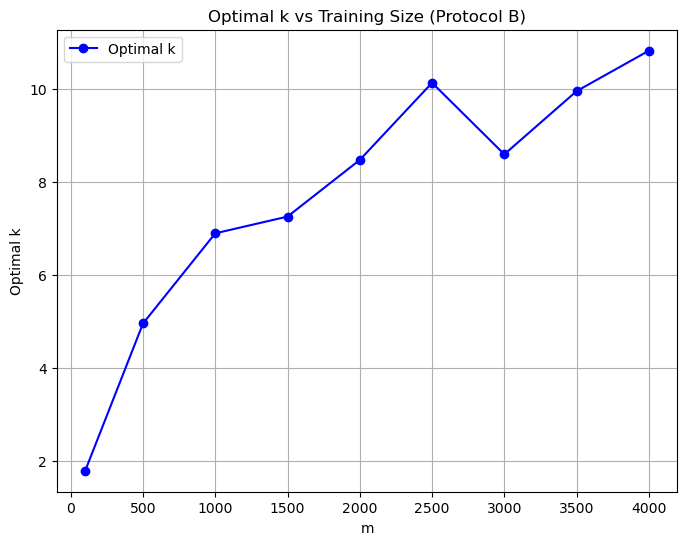

In [40]:
def optimal_k(S, ms, ks, runs=100, test_size=1000):
    mean_optimal_ks = []

    for m in ms:
        optimal_ks = []
        for _ in range(runs):
            X_train, y_train = generate_noise(S, v=3, size=m, noise_prob=0.2)
            X_test, y_test = generate_noise(S, v=3, size=test_size, noise_prob=0.2)
            errors = [calculate_error(X_train, y_train, X_test, y_test, k) for k in ks]
            optimal_k = ks[np.argmin(errors)]
            optimal_ks.append(optimal_k)
        mean_optimal_ks.append(np.mean(optimal_ks))
    return mean_optimal_ks

ms = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
ks = range(1, 50)

np.random.seed(77)
S_size = 100
x_S = np.random.rand(S_size, 2)
y_S = np.random.choice([0, 1], size=S_size)
S = (x_S, y_S)

mean_optimal_ks = optimal_k(S, ms, ks, runs=100, test_size=1000)

plt.figure(figsize=(8, 6))
plt.plot(ms, mean_optimal_ks, marker='o', linestyle='-', color='b', label='Optimal k')
plt.title('Optimal k vs Training Size (Protocol B)')
plt.xlabel('m')
plt.ylabel('Optimal k')
plt.grid()
plt.legend()
plt.show()